In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def r2_score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y.mean()) ** 2)
        return 1 - (ss_res / ss_tot)

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * np.dot(self.X.T, (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def fit(self, X, Y, feature_names=None):
        self.m, self.d = X.shape
        self.W = np.zeros(self.d)
        self.b = 0
        self.X = X
        self.Y = Y
        self.feature_names = feature_names if feature_names else [f"x{i}" for i in range(self.d)]
        self.error_list = []

        for _ in range(self.iterations):
            self.update_weights()
            Y_pred = self.predict(X)
            error = np.mean((Y - Y_pred) ** 2)
            print(error)
            self.error_list.append(error)

        return self

    def get_coefficients(self):
        return pd.Series(self.W, index=self.feature_names, name="Coefficient")

    def get_intercept(self):
        return self.b


In [49]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [53]:
X = df.drop('selling_price', axis=1)
y = df["selling_price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
lr = LinearRegression(iterations=200)
lr.fit(X_train, y_train)

0.8672831243517237
0.749803178526304
0.6514914739546037
0.5691243209302203
0.5000290662592021
0.4419890111388331
0.39316482501741346
0.3520295845950901
0.31731506763203043
0.28796734438968596
0.2631100505957363
0.24201400738158002
0.2240720860822865
0.2087784076874941
0.19571112516500044
0.18451816768793583
0.17490543380257553
0.16662700975629463
0.15947706284833676
0.15328312048093978
0.1479004958126302
0.14320766239621516
0.13910241444582155
0.13549867767878848
0.1323238590582287
0.12951664307825644
0.12702515819421875
0.12480545018926155
0.1228202101687401
0.12103771388373925
0.11943093653323349
0.11797681335276992
0.11665562139026832
0.11545046208176678
0.11434682772463868
0.1133322378292487
0.11239593371651768
0.11152862170457671
0.11072225686378324
0.10996986067463424
0.10926536704611751
0.10860349208292747
0.10797962376190143
0.10738972831841724
0.10683027067498813
0.10629814668562955
0.10579062533623818
0.1053052993460231
0.1048400428685597
0.10439297520205482
0.103962429594172

In [59]:
lr.predict(X_test)

array([-0.88576494, -0.30650237,  2.51721671, ...,  0.5457728 ,
       -0.57198616,  0.05599245])

In [63]:
lr.r2_score(X_train, y_train)

0.9245075251426267

In [35]:
lr.r2_score(X_test, lr.predict(X_test))

1.0

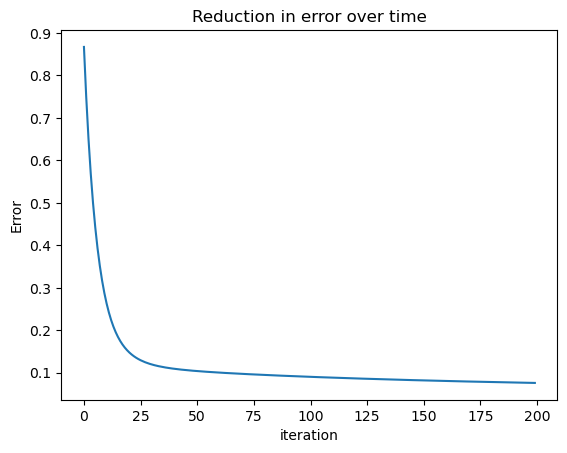

In [65]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [39]:
lr.get_coefficients()

x0     0.125722
x1    -0.047847
x2    -0.050197
x3     0.093654
x4     0.154132
x5    -0.125722
x6     0.189528
x7     0.371064
x8    -0.025478
x9    -0.004997
x10    0.045118
x11    0.016967
x12    0.002790
x13   -0.042832
x14   -0.105770
x15   -0.005216
x16    0.003182
Name: Coefficient, dtype: float64

In [41]:
X_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
19738,0.450030,0.615718,-1.515564,1.963710,0.055341,-0.450030,0.724475,0.485469,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
17034,0.762867,0.091763,2.070095,-0.439107,-0.538932,-0.762867,-0.433854,-0.212522,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
17080,0.137194,0.390790,0.294717,-0.439107,-0.209177,-0.137194,-0.433854,-0.075023,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
7420,0.450030,-0.737872,0.259814,-0.535528,-0.695319,-0.450030,-0.778348,-0.747823,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,-2.249703,2.354446
15375,0.762867,0.306326,-0.629038,0.041071,0.406096,-0.762867,-0.177218,0.205223,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,-1.426990,2.356048,-0.582501,0.041071,0.444076,1.426990,-0.177218,-0.537901,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
7291,1.075704,-0.396574,0.532055,-0.921213,-0.694202,-1.075704,-0.433854,-0.642862,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
17728,1.075704,-0.389806,0.706568,-0.153700,-0.209177,-1.075704,-0.327501,0.459228,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
7293,-0.175643,0.231356,-0.093865,-0.537456,-0.275307,0.175643,-0.433854,-0.474924,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728


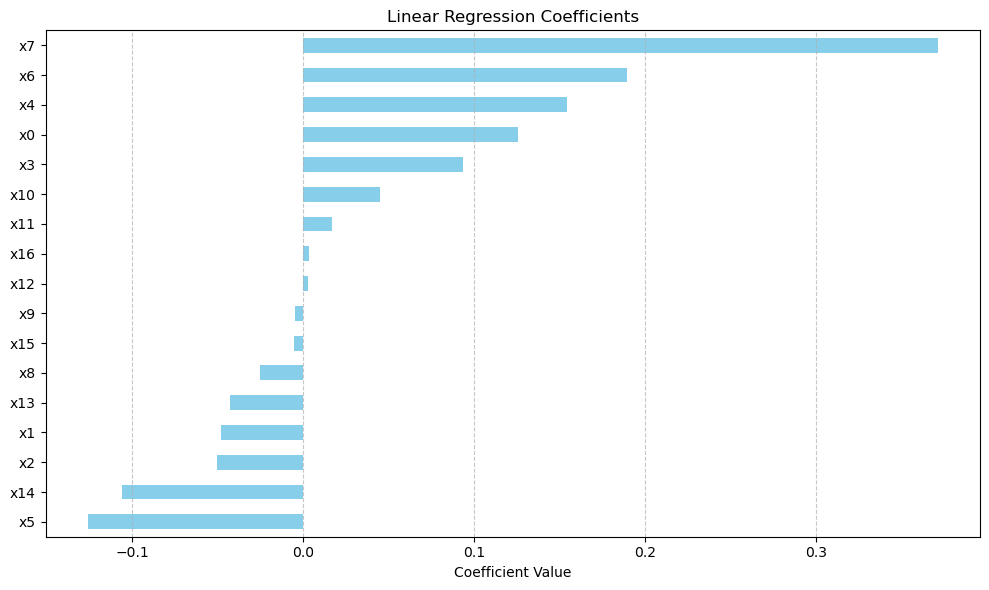

In [43]:
coefficients = lr.get_coefficients()

# Plot
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()